<a href="https://colab.research.google.com/github/fabiodemo/Tensorflow-Developer-Certificate/blob/main/Neural%20Network%20Classification/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with TensorFlow

In this notebook, we're going to learn how to write Neural Networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
- Binary classification;
- Multiclass classification;
- Multilabel classification.

## Creating data to view and fit

In [26]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [27]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [28]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now, let's visualize it!

In [29]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


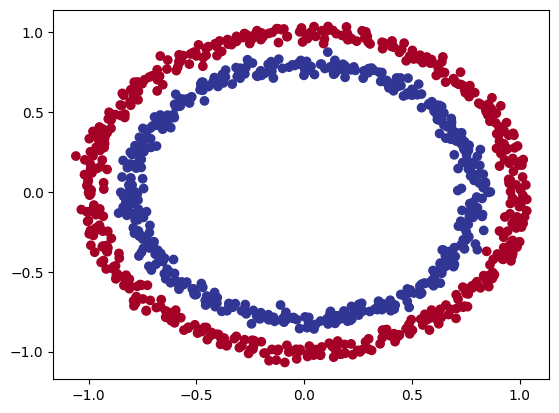

In [30]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [31]:
X.shape, y.shape

((1000, 2), (1000,))

In [32]:
# Check how many samples we're working
len(X), len(y)

(1000, 1000)

In [33]:
# View the first example of features and labels
X[0], y[0]
X[25], y[25]

(array([-0.93699411,  0.19944235]), 0)

## Steps in modelling
The steps in moddeling with TensorFlow are tipically:
1. Create a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model


In [34]:
import tensorflow as tf

In [35]:
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.6122 - accuracy: 0.4870
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.2939 - accuracy: 0.4660
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 2.8094 - accuracy: 0.4890
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7607 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.4930


In [36]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Trying to improve the model by training it for longer
model_1.fit(X, y, epochs=100, verbose=0)
model_1.evaluate(X,y)
# This approach is wrong, since we're evaluating the same trained data. We should create a training dataset
# But we're working in a "toy problem", so it's okay in this case

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy, it's performing as if it's guessing.

So let's add an extra layer

In [38]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.8544 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5020
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4930
Epoch 11/

In [39]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932432651519775, 0.5]

In [40]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Possible steps to improve the model:
1. Create a model - we might to add more layers or increase the number of hidden units within a layer;
2. Compiling a model - We might to choose a different a different optimization function (such as Adam instead of SGD);
3. Fitting a model - Perhaps we might fit our model for more epochs (leaving it training longer);

In [41]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), # Changed to Adam
              metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 5.5793 - accuracy: 0.4830
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 5.5027 - accuracy: 0.4790
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 5.4759 - accuracy: 0.4810
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 5.3862 - accuracy: 0.4780
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 5.1189 - accuracy: 0.4700
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 4.7946 - accuracy: 0.4700
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 4.6497 - accuracy: 0.4740
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 4.6116 - accuracy: 0.4690
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 4.6004 - accuracy: 0.4710
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 4.5945 - accuracy: 0.4710


In [42]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_4.fit(X, y, epochs=100, verbose=0)

In [43]:
model_4.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6985 - accuracy: 0.5080


[0.6985210180282593, 0.5080000162124634]

In [44]:
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               300       
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


To visualize our model's predictions, let's create a function `plot_decision_boundary()`. This function will:

* Take in a trained model, features (X) and label (y);
* Create a meshgrid of the different X values;
* Make predictions across the meshgrid;
* Plot the predicitons as well as a line between zones (where each unique class falls).

In [45]:
import numpy as np

In [46]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [47]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [48]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. madewithml
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # If so, we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


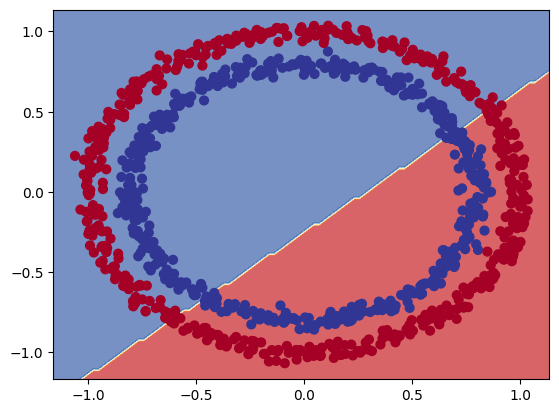

In [49]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [50]:
# Let's see fi our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train =  X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

We compiled our model for a binary classification problem. 
But now we're working on a regression problem, so let's change the model to suit our data

In [51]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 7ms/step - loss: 465.4481 - mae: 465.4481
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 363.8605 - mae: 363.8605
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 264.8489 - mae: 264.8489
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 160.6654 - mae: 160.6654
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 60.2859 - mae: 60.2859
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 74.2091 - mae: 74.2091
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 79.2492 - mae: 79.2492
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 52.5841 - mae: 52.5841
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 46.5169 - mae: 46.5169
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 48.0228 - mae: 48.0228
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 10ms/step


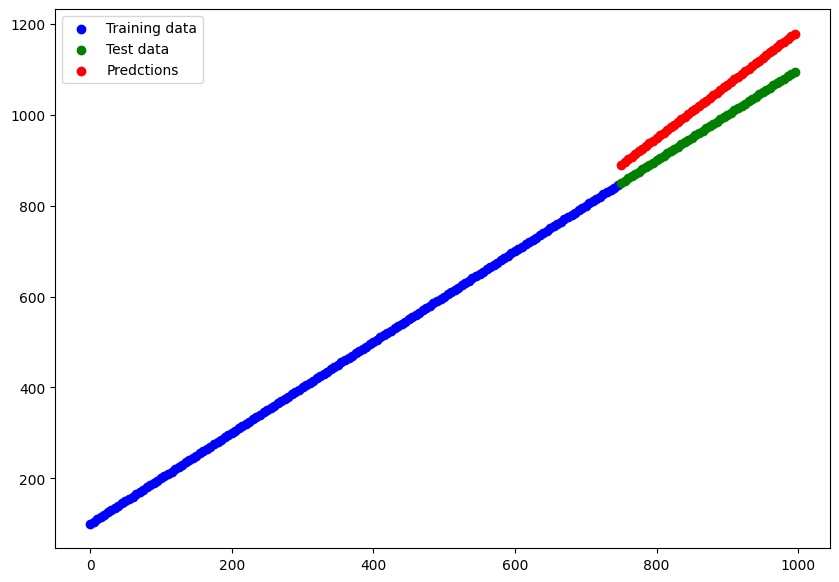

In [52]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's prediction against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predctions")
plt.legend();

# The missing piece: Non-linearity

In [53]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# 2. Compile the moadel
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.2052 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2016 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2002 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1994 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1984 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1974 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1963 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1955 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1945 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1760 - accuracy: 0.4860
Epoch 11/

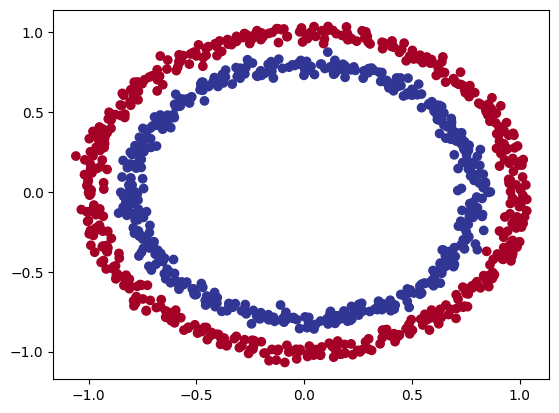

In [58]:
history

# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 3ms/step
doing binary classification


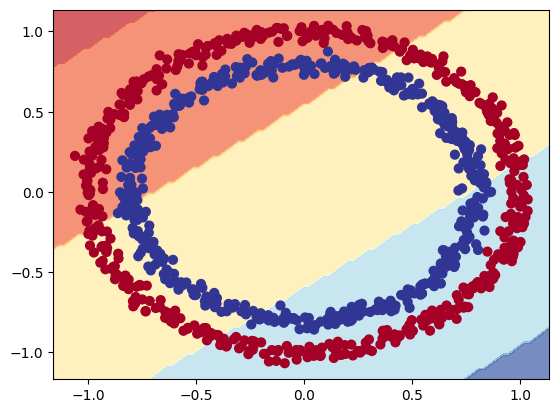

In [60]:
# Checking the decision boundary
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Trying to build the first neural network with a non-linear activation function

In [62]:
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile the moadel
model_5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.7438 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7379 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7336 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7307 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7282 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7178 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 5.6253 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 5.5776 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.5381 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5348 - accuracy: 0.4750
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


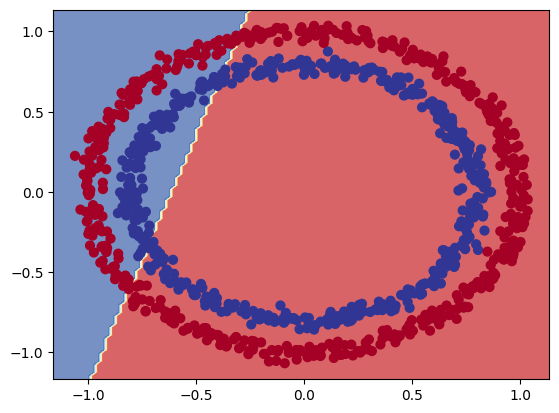

In [63]:
# Checking the decision boundary
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [65]:
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the moadel
model_6.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.8182 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7366 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7146 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7087 - accuracy: 0.3760
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7053 - accuracy: 0.3320
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7021 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.3570
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.3960
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4370
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classification


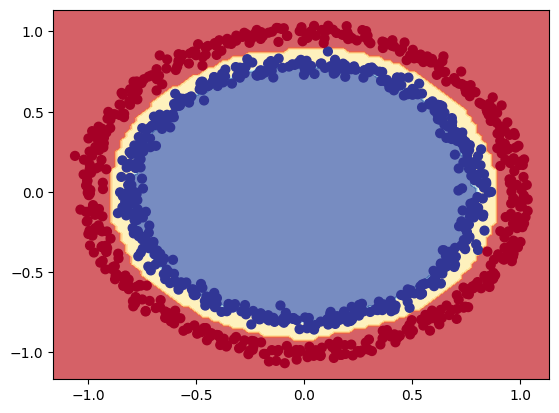

In [66]:
# Checking the decision boundary
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [70]:
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu"),
])

# 2. Compile the moadel
model_7.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


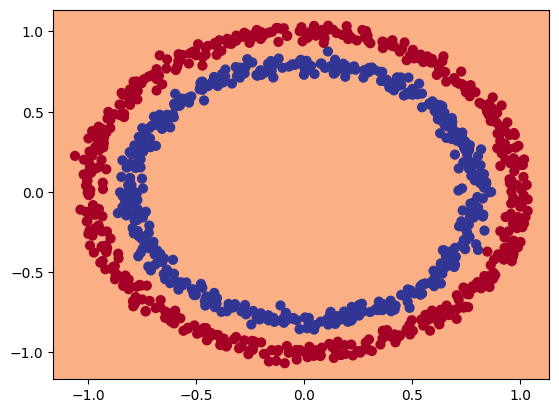

In [71]:
# Checking the decision boundary
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [83]:
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the moadel
model_8.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7129 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4470
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4030
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4290
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4530
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4570
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4620
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4540
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


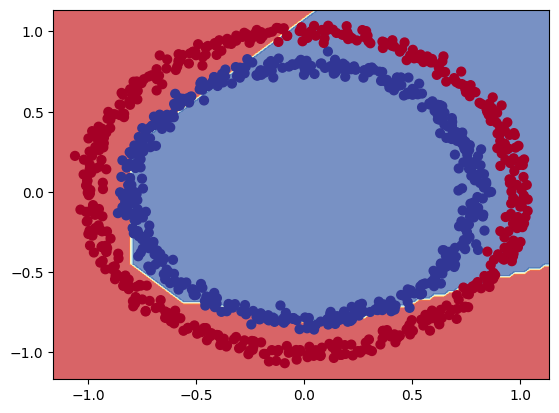

In [84]:
# Checking the decision boundary
plot_decision_boundary(model=model_8,
                       X=X,
                       y=y)

In [86]:
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the moadel
model_9.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_9.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 2s 3ms/step - loss: 0.6950 - accuracy: 0.5050
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5040
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5070
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5160
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5050
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4940
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5070
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5110
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5100
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5120
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


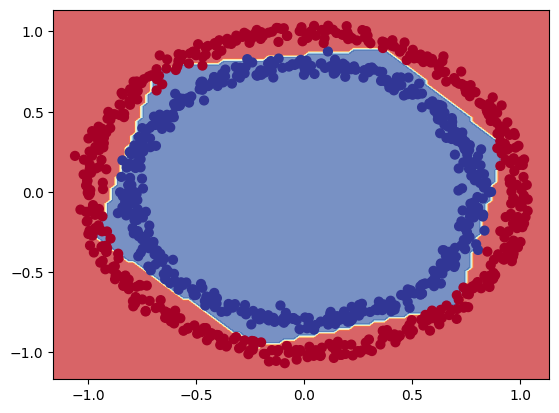

In [88]:
# Checking the decision boundary
plot_decision_boundary(model=model_9,
                       X=X,
                       y=y)